# MLA - Uebung 1 
Gerald Ebmer, e01325683

## 1.1.1

Index(['x', 'y'], dtype='object')
Index(['x', 'y'], dtype='object')


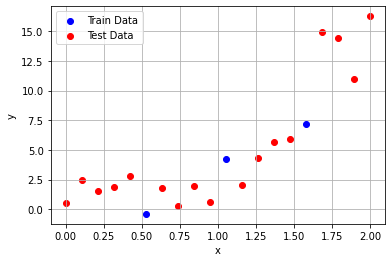

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the data from the CSV files using pandas
train_data = pd.read_csv('regression_train.csv')
test_data = pd.read_csv('regression_test.csv')

# show columns of train_data
print(train_data.columns)
print(test_data.columns)

# Generate a scatterplot of Ttrain and Ttest
plt.scatter(train_data['x'], train_data['y'], c='blue', label='Train Data')
plt.scatter(test_data['x'], test_data['y'], c='red', label='Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


In [15]:
# number of training samples
n_train = len(train_data)
print('Number of training samples: ', n_train)

# number of test samples
n_test = len(test_data)
print('Number of test samples: ', n_test)

Number of training samples:  3
Number of test samples:  17


## 1.1.2

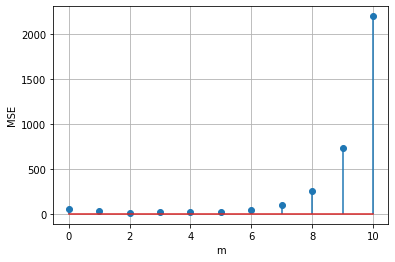

In [18]:
import numpy as np

def solve_ls(x,y,m):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the least squares solution
    p = np.linalg.pinv(S) @ y
    return p

def est_ls(x,m,p):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the mean squared error
    y_est = S @ p
    return y_est

def get_mse(x,y,m,p):
    # Calculate the mean squared error
    y_est = est_ls(x,m,p)
    mse = np.mean((y_est - y)**2)
    return mse

# Calculate the least squares solution for m=1..10
mse_ls = []
for m in range(0,11):
    p = solve_ls(train_data['x'], train_data['y'], m)
    mse = get_mse(test_data['x'], test_data['y'], m, p)
    mse_ls.append(mse)

# stem plot for mse_ls
plt.stem(range(0,11), mse_ls)
plt.xlabel('m')
plt.ylabel('MSE')
plt.grid()
plt.show()

In [16]:
# Index of minimum MSE
m_opt = np.argmin(mse_ls)
print('Optimal degree of polynomial: ', m_opt)

Optimal degree of polynomial:  2


Minimum MSE at m = 2 (-> 3 coefficients) due to number of training samples 3. 

## 1.1.3

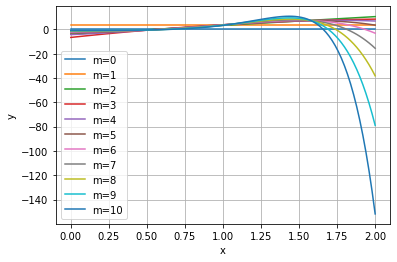

In [19]:
x = np.linspace(0, 2, 100)

for m in range(0,11):
    p = solve_ls(train_data['x'], train_data['y'], m)
    y_est = est_ls(x,m,p)
    mse_ls.append(mse)
    # plot y_est for m=1..10
    plt.plot(x, y_est, label='m='+str(m))
    # hold on

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()



## 1.1.4 Analytical solution for Ridge regression

## 1.1.5 Ridge regression

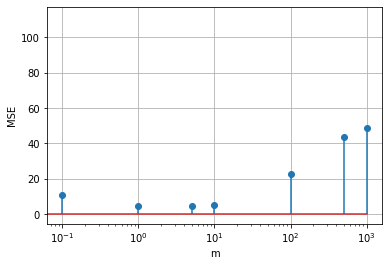

p_ls:  [-2.94675647  2.41336295  3.92035228  2.4486085  -2.10210303]
p_ridge:  [ 4.980609    8.87831207  1.63857404  5.58444698 -3.93390977]
delta y_est:  [0. 0. 0.]


In [25]:
def solve_ridge(x,y,m,l):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the least squares solution
    p = np.linalg.inv(l*np.eye(m) + S.transpose() @ S) @ S.transpose() @ y
    return p

def est_ridge(x,m,p):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the mean squared error
    y_est = S @ p
    return y_est

def get_mse_ridge(x,y,m,p):
    # Calculate the mean squared error
    y_est = est_ridge(x,m,p)
    mse = np.mean((y_est - y)**2)
    return mse

# Calculate the least squares solution for m=1..10
mse_ridge = []
m = 5
l_ls = [0, 0.1, 1, 5, 10, 100, 500, 1000]
for l in l_ls:
    p = solve_ridge(train_data['x'], train_data['y'], m, l)
    mse = get_mse_ridge(test_data['x'], test_data['y'], m, p)
    mse_ridge.append(mse)

plt.stem(l_ls, mse_ridge)
plt.semilogx()
plt.xlabel('m')
plt.ylabel('MSE')
plt.grid()
plt.show()

# sanity check
m = 5
l = 0
p_ls = solve_ls(train_data['x'], train_data['y'], m)
p_ridge = solve_ridge(train_data['x'], train_data['y'], m, l)
y_ls = est_ls(train_data['x'],m,p)
y_ridge = est_ridge(train_data['x'],m,p)
print('p_ls: ', p_ls)
print('p_ridge: ', p_ridge)
print('delta y_est: ', y_ls - y_ridge)
